In [ ]:
#bu derste siniflama ve kümeleme algoritmalarini görecegiz 
#resimdeki sayilari farkeden bir model olusturacagiz
#burda boyut azaltma calismasida yapacagiz ,burdaki amacimiz, veri seti 
#daha düsük bir boyut ile temsil ediliü edilemeyecegini görmektir
#boyutu azaltilan veri seti daha kolay görsellestirilir



## Siniflandirma islemi

In [33]:
import seaborn as sns       #grafik cizecegiz 
from sklearn.decomposition import PCA  #model sinifi
import matplotlib.pyplot as plt    #el yazisi verilerini göstermek icin, plt.subsplot lazim olacal

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_iris = iris.drop('species', axis=1)  #simdi asagida egitimde kullanacagimiz Features leri olusturalim

In [5]:
y_iris = iris.species

In [7]:
model = PCA(n_components=2)     #PCA sinifinda bir model kurmus olduk

#hiperparametre olarak n_component 

In [8]:
model.fit(X_iris)  

#modeli kurduk,denetimsiz ögrenme oldugu icin y_iris kullanmiyoruz

PCA(n_components=2)

In [10]:
X_2D = model.transform(X_iris)   #bunlari grafik cizmek icin yapacagiz
#veriyi iki boyutlu hale getirmek icin  transform methodunu kullan
#önceden 4 tane features'i vardi iris'in length falan diye

In [11]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]


#biz buldugumuz verileri iris veri setine sütun olarak ekleyerek grafik cizmeyi kolaylastiracagiz

In [13]:
iris.head()

#herbir satirin PCA1 ve PCA2 si var, PCA bir model

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


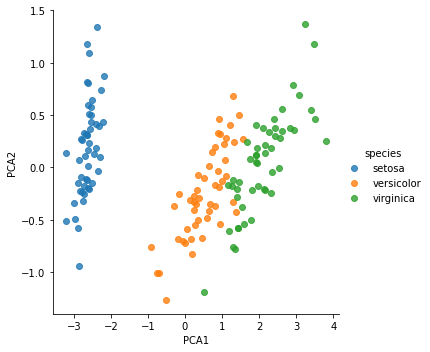

In [16]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False);

##simdi sonuclarin grafigini cizelim
#türlerin etiketlerini bilmemesine ragmen siniflandirdi
#bu grafikle bu veri seti icin, basit siniflandirma yönteminin kullanilabilecegini gördük.


***

## kümeleme islemi

In [ ]:
#güclü bir kümeleme yöntemi olan Gaussenmixture'i kullanalim

In [17]:
from sklearn.mixture import GaussianMixture

In [18]:
model = GaussianMixture(n_components=3, covariance_type='full')

In [19]:
model.fit(X_iris)      #modeli kurduk   

GaussianMixture(n_components=3)

In [21]:
y_gmm = model.predict(X_iris)

#kümeleme etiketlerini belirleyecegiz
#bu simdi verilerimizi kümeliyor

In [22]:
iris['kümeleme'] = y_gmm

In [23]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kümeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532,2
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317,2
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859,2
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628,2


/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


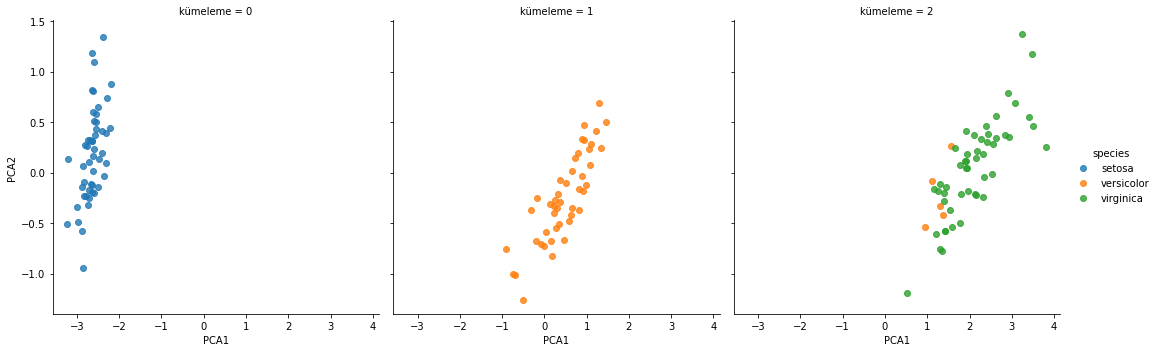

In [25]:
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris,col='kümeleme', fit_reg=False);

#simdide seaborn ile sonuclarin grafigini cizelim ,yukardakini alip,kümelemeyi ekledi
#0 setosa idi, ve onu  güzelce ayirdi

***

In [ ]:
#burda elle yazilan sayilari tahmin etme algoritmasini kullanacagit
#veri seti icinde yüklü 

In [39]:
from sklearn.datasets import load_digits

In [40]:
digits = load_digits()

In [41]:
digits.images.shape
#bu resimler 3 boyutlu resimler
#1797 tane örneklerm var, ve her bir foto 8x8 lik piksellerden olusuyor

(1797, 8, 8)

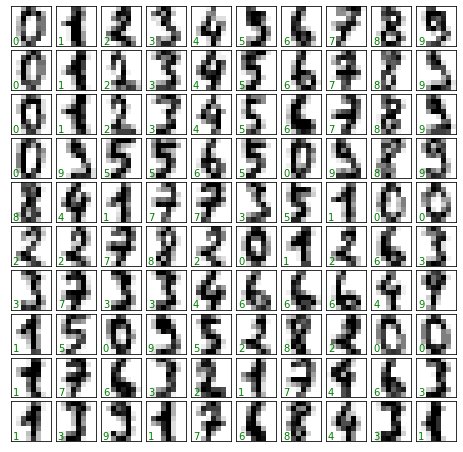

In [47]:
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
#(10,10) bunu (10,5) yapsam,10 satir ve 5 sütunluk foto gösteriyor


for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation ='nearest') #bu her bir sayiyi cagiriyor
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
    
    
#her bir rakam 8x8=64 pikselden olusuyor, ve bir foto herbir pikseli yanyana düsünürsek
#64 uzunlugunda bir diziye sahip oluruz

In [49]:
X = digits.data    #featuresler ,bu iki boyutlu
y = digit.target   #targetler   ,bu tek boyutlu

print(X.shape)

print(y.shape)

(1797, 64)
(1797,)


In [50]:
from sklearn.manifold import Isomap

#(1797, 64) bu 64 boyutlu,yani sütunlu demek.
#simdi fotolari 2 boyuta düsürecegiz,bunun icin bir algoritma kullanacagiz

In [51]:
iso = Isomap(n_components=2)

In [52]:
iso.fit(X)

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap()

In [53]:
data2 = iso.transform(X)

In [54]:
data2

array([[162.58881242,  27.21966931],
       [-46.79288172,  48.38888043],
       [-98.0223123 ,  21.77269113],
       ...,
       [-50.28801847, -24.82301064],
       [ -1.68893553, -72.02296248],
       [-10.35882414, -37.24542549]])

In [55]:
data2.shape  

#bu sekilde 2 boyuta düsürdük

(1797, 2)

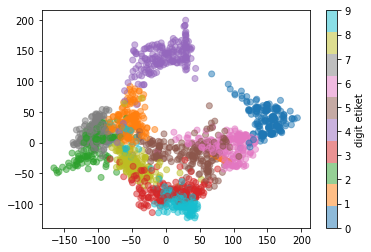

In [57]:
plt.scatter(data2[:,0], data2[:,1], c=digits.target, alpha=0.5,
           cmap=plt.cm.get_cmap('tab10',10))
plt.colorbar(label='digit etiket', ticks=range(10));

#bu sekilde sayilarin birbirinden ayri renklerle ayrildigini görüyoruz
#üst üste olan yerlerde tam bir ayrim yapamamis

#maviler 0,turuncular 1, bunlar yazilis olarak birbirine benzemedigi icin bu renkler üstüste gelmemis
#1 ve 4 yanyana gelmis,galiba bazi insanlar 1 i sapkali yaptigi icin,model onlara 4 demis olabilir

burdan biz bu veri icin siniflandirma algoritmasini kullanabilecegimizi aliyoruz

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
model = GaussianNB()

In [70]:
model.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred   #X_testteki fotolardan, sayilarin tahmini yapti

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 3, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 4, 8, 9, 7, 7, 8, 1, 6, 5, 8, 5, 5, 4, 1, 7, 0, 6, 8, 5, 8, 1,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 8, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 7, 0, 1, 4, 6, 4, 3, 8, 0, 9, 5, 3, 1, 1, 4, 8, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 1, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 8, 0,

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


#bu dogruluk oraninda tahmin ediyor

0.8333333333333334

In [74]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)

In [76]:
mat

#bunu grafikle gösterelim

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

Text(91.68, 0.5, 'Gercek Deger')

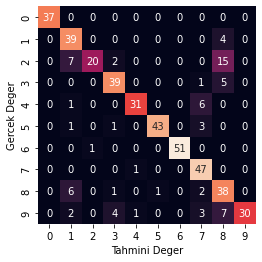

In [79]:
sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('Tahmini Deger')
plt.ylabel('Gercek Deger')


#burda mesela gercej deger olan 2 yi 15 defa 8 olarak tahmin etmis